In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyarrow.feather

In [3]:
df_training = pd.read_csv("cs-training.csv", index_col=0)
df_training

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
df_training.isna().sum(axis=0)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
df_training["MonthlyIncome"] = df_training["MonthlyIncome"].fillna(value = df_training["MonthlyIncome"].mean())
df_training["NumberOfDependents"] = df_training["NumberOfDependents"].fillna(value = df_training["NumberOfDependents"].mean())
df_training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
from sklearn.model_selection import train_test_split

X = df_training.drop(columns="SeriousDlqin2yrs")
y = df_training[["SeriousDlqin2yrs"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
# standardize X
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) #注意fit的用法
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
y_train = np.array(y_train["SeriousDlqin2yrs"])
y_test = np.array(y_test["SeriousDlqin2yrs"])

## 1.logistic regression

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')     

In [12]:
from sklearn.linear_model import LogisticRegression

#record the number of coef
coef_number = []

#record the estimation results of coef
coef_result = {}
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, penalty = "l1",random_state=1,solver = "liblinear", multi_class='ovr')
    lr.fit(X_train_std, y_train)
    feature_num = sum(sum(lr.coef_ !=0))
    coef_number.append([10.**c,feature_num])
    coef_result[10.**c] = lr.coef_

In [13]:
coef_number

[[1e-05, 0],
 [0.0001, 0],
 [0.001, 2],
 [0.01, 8],
 [0.1, 10],
 [1.0, 10],
 [10.0, 10],
 [100.0, 10],
 [1000.0, 10],
 [10000.0, 10]]

In [14]:
coef_result[0.001]

array([[ 0.        , -0.26957673,  0.10883184,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [16]:
#select these two features
X_train_std_selected = X_train_std[:,1:3]
X_test_std_selected = X_test_std[:,1:3]

In [17]:
#Train the logistic regression again
lr = LogisticRegression(C=1.0, penalty = "l1",random_state=1,solver = "liblinear", multi_class='ovr')
lr.fit(X_train_std_selected, y_train)

LogisticRegression(multi_class='ovr', penalty='l1', random_state=1,
                   solver='liblinear')

C:\Users\29128\AppData\Local\Temp\ipykernel_32084\2032430309.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


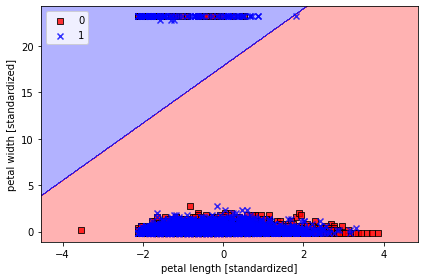

In [18]:
plot_decision_regions(X_train_std_selected, y_train,
                      classifier=lr) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## 2.SVM

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

gamma = [0.1 , 1, 10]
C = [0.1 , 1, 10]
acc_set = []
para_set  = []
for i in gamma:
    for j in C:
        svm = SVC(kernel='rbf', random_state=1, gamma= i, C= j , max_iter = 1000)
        svm.fit(X_train_std_selected, y_train)
        y_predict = svm.predict(X_test_std_selected)
        acc = accuracy_score(y_test, y_predict)
        acc_set.append(acc)
        para_set.append([i,j])

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler

In [20]:
#check the accuracy under different parameters 
print(acc_set)
print(para_set)

[0.10497777777777778, 0.10497777777777778, 0.10497777777777778, 0.3057111111111111, 0.3057111111111111, 0.5986444444444444, 0.7600888888888889, 0.9092666666666667, 0.8133111111111111]
[[0.1, 0.1], [0.1, 1], [0.1, 10], [1, 0.1], [1, 1], [1, 10], [10, 0.1], [10, 1], [10, 10]]


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\29128\AppData\Local\Temp\ipykernel_32084\2032430309.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


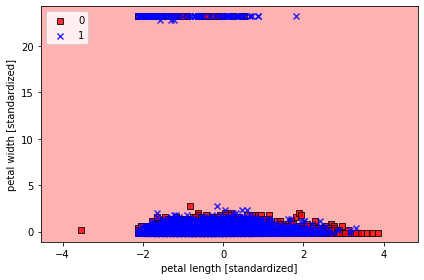

In [21]:
svm = SVC(kernel='rbf', random_state=1, gamma= 10, C= 1 , max_iter = 1000)
svm.fit(X_train_std_selected, y_train)

plot_decision_regions(X_train_std_selected, y_train,
                      classifier=svm) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## 3. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

depth = [3,4,5,6,7,8]
acc_set = []
para_set  = []
for i in depth:
    tree_model = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=1)
    tree_model.fit(X_train_std_selected, y_train)
    y_predict = tree_model.predict(X_train_std_selected)
    acc = accuracy_score(y_train, y_predict)
    acc_set.append(acc)
    para_set.append(i)

In [23]:
#check the accuracy under different parameters 
print(acc_set)
print(para_set)

[0.9331619047619047, 0.9333904761904762, 0.9336571428571429, 0.9337714285714286, 0.9338285714285715, 0.9339619047619048]
[3, 4, 5, 6, 7, 8]


C:\Users\29128\AppData\Local\Temp\ipykernel_32084\2032430309.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


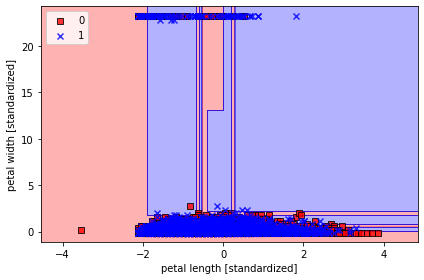

In [24]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
tree_model.fit(X_train_std_selected, y_train)

plot_decision_regions(X_train_std_selected, y_train,
                      classifier=tree_model) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## 4.Predict on the test set

In [28]:
data_test = pd.read_csv("cs-test.csv", index_col = 0)
data_test = data_test.drop(columns="SeriousDlqin2yrs")
data_test_std = sc.transform(data_test)
data_test_std = data_test_std[:,1:3]

In [32]:
data_test_Y = pd.read_csv("sampleEntry.csv", index_col = 0)
data_test_Y.head()

,Probability
Id,
1,0.080807
2,0.040719
3,0.011968
4,0.067640
5,0.108264


In [33]:
#Because the label of test_Y is probability, we take y=1 if probability > 0.5 , else y = 0
data_test_Y.loc[data_test_Y["Probability"] > 0.5,:] = 1
data_test_Y.loc[data_test_Y["Probability"] <= 0.5,:] = 0

In [34]:
data_test_Y = np.array(data_test_Y["Probability"])

C:\Users\29128\AppData\Local\Temp\ipykernel_32084\2032430309.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


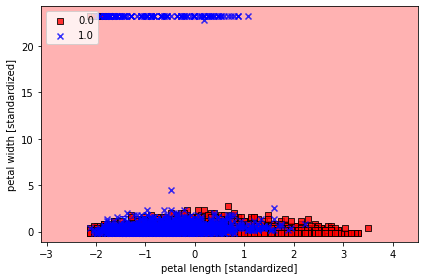

In [35]:
## SVM ##
plot_decision_regions(data_test_std, data_test_Y,
                      classifier=svm) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

C:\Users\29128\AppData\Local\Temp\ipykernel_32084\2032430309.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


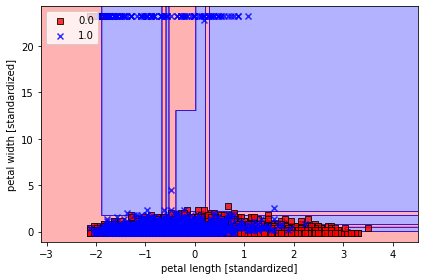

In [36]:
## Decision Tree ##
plot_decision_regions(data_test_std, data_test_Y,
                      classifier=tree_model) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()